In [1]:
import qiskit
import numpy as np
from qiskit import(
    IBMQ, QuantumCircuit, ClassicalRegister, QuantumRegister, execute,
    QuantumCircuit,
    execute,
    Aer)
from qiskit.visualization import plot_histogram, plot_state_city


In [27]:
l = [0,1,2,3]

In [83]:
qcoin[:]+qpos[0:]

[Qubit(QuantumRegister(2, 'qanc'), 0),
 Qubit(QuantumRegister(2, 'qanc'), 1),
 Qubit(QuantumRegister(4, 'qc'), 0),
 Qubit(QuantumRegister(4, 'qc'), 1),
 Qubit(QuantumRegister(4, 'qc'), 2),
 Qubit(QuantumRegister(4, 'qc'), 3)]

In [136]:
def increment_gate(circuit, qpos, qcoin):
    n = len(qpos)
    for i in range(n):
        circuit.mct(qcoin[:]+qpos[i+1:], qpos[i], None, mode='noancilla')
#     print("+")

def decrement_gate(circuit, qpos, qcoin):
    n = len(qpos)
#     print(n)
    for i in range(n):
        if i+1 < n: circuit.x(qpos[i+1:])
        circuit.mct(qcoin[:]+qpos[i+1:], qpos[i], None, mode='noancilla')
        if i+1 < n: circuit.x(qpos[i+1:])
#     print("-")
    
def step(circuit, qpos, qcoin):
    circuit.h(qcoin)
    circuit.barrier()
    # y operations
    increment_gate(circuit, qpos[len(qpos)//2:], qcoin)
    circuit.x(qcoin[0])
    decrement_gate(circuit, qpos[len(qpos)//2:], qcoin)
    # x operations
    circuit.x(qcoin)
    increment_gate(circuit, qpos[:len(qpos)//2], qcoin)
    circuit.x(qcoin[0])
    decrement_gate(circuit, qpos[:len(qpos)//2:], qcoin)
    circuit.barrier()


In [149]:
simulator = Aer.get_backend('qasm_simulator')

n=3

qpos = QuantumRegister(2*n,'qc')
qcoin = QuantumRegister(2,'qanc')

cpos = ClassicalRegister(2*n,'cr')

circuit = QuantumCircuit(qpos, qcoin, cpos)

step(circuit, qpos, qcoin)
# step(circuit, qpos, qcoin)

# # Map the quantum measurement to the classical bits
circuit.measure(qpos,cpos)

# # Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# # Grab results from the job
result = job.result()

# # Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
# circuit.draw()


Total count for 00 and 11 are: {'000100': 240, '111000': 267, '000111': 231, '100000': 262}


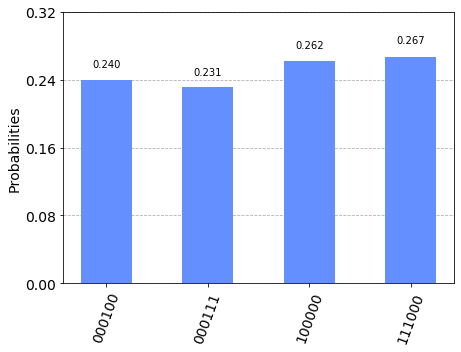

In [150]:
# Plot a histogram


plot_histogram(counts)

In [3]:
import numpy as np

In [4]:
l = [0,2,3]

In [5]:
lp = np.array([0,2,3])

In [9]:
0.97*lp

array([0.  , 1.94, 2.91])